In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

In [6]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement

In [9]:
# Save references to each table
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cfd7780e08>,
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397'}

In [12]:
# Find the most recent date in the data set.
recent_dt = session.query(Measurement).order_by(Measurement.date.desc())
for date in recent_dt.limit(1):
    print(date.date)

2017-08-23


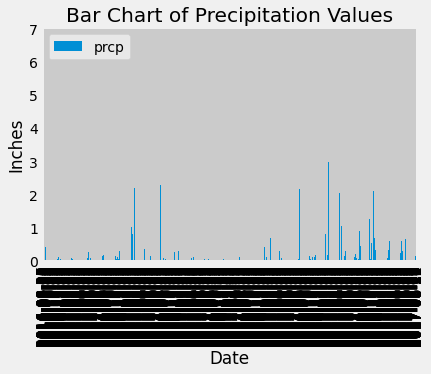

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
data_df = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').all()

# Perform a query to retrieve the data and precipitation scores

# for date in prec_data:
#     print(date.date)

# Save the query results as a Pandas DataFrame and set the index to the date column
prec_df = pd.DataFrame(data_df, columns=['date', 'prcp'])
prec_df.set_index('date', inplace=True)
# Sort the dataframe by date
prec_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data

prec_df.plot.bar(rot=90)
# plt.axes(['2016-08-23','2016-10-01','2016-11-09','2017-07-10'])
# plt.xticks(['2016-08-23','2016-10-01','2016-11-09','2017-07-10'])
plt.title('Bar Chart of Precipitation Values')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
st_first_row = session.query(Station).first()
st_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1cfdc465b48>,
 'id': 1,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

In [16]:
# Design a query to calculate the total number stations in the dataset
number_stations = session.query(Station.name).count()
print(number_stations)

9


In [17]:
# Design a query to calculate the total number stations in the dataset
session.query(Measurement.station).group_by(Measurement.station).count()

9

In [46]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
#active_df = 
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).\
     order_by(func.count(Measurement.station).desc()).all()
   

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(Measurement.station, func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()

(13294, 'USC00519281', 85.0, 54.0, 71.66378066378067)

In [70]:
temps_data = session.query(Measurement.tobs).filter(Measurement.date > '2016-08-22').filter(Measurement.station == 'USC00519281').all()
temps_df = pd.DataFrame(temps_data, columns=['tobs'])
temps_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


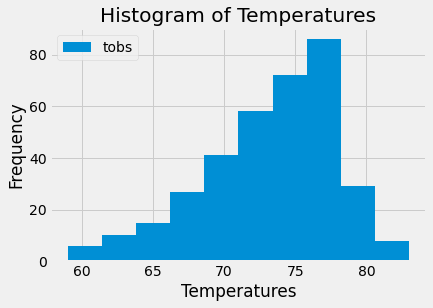

In [75]:
temps_df.plot.hist()
plt.title('Histogram of Temperatures')
plt.xlabel('Temperatures')
plt.show()

# Close session

In [76]:
# Close Session
session.close()